## 1. Import des librairies

In [1]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2. Chargement des données

In [2]:
df = pd.read_csv("data/clean.csv", index_col=["Unnamed: 0"])

In [3]:
df

,tags,document
2,node.js,restart node upon change file For someone come...
3,html css,100 min height css layout What best way make e...
4,regex language-agnostic,stack overflow generate seofriendly urls What ...
5,java,get oslevel system information I currently bui...
6,security,disable browser ave password functionality One...
...,...,...
16368,oop,difference interface abstract class What exact...
16370,ios xcode,symbolicate crash log xcode Xcode 5 organizer ...
16371,java spring,spring boot multiple external configuration fi...
16372,java c++,java final vs c++ const The Java C programmers...


In [4]:
df["tags"] = df["tags"].apply(lambda x: x.split())

## 3. Analyse non-supervisé

### 3.1. Transformation texte en matrice TF-IDF

In [5]:
def find_optimal_cluster(data, max_k):
    iters = range(1, max_k+1, 5)
    sse = []
    
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Nombre de Clusters')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title("SSE par nombre de clusters")
    plt.tight_layout()
    plt.show()
    
    
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
def get_top_keywords(data, clusters, labels, n_terms):
    temp_df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i, r in temp_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

### 3.2. Matrice monogramme

In [6]:
tf_idf_vectorizer_mono = TfidfVectorizer(ngram_range=(1,1))

In [7]:
tf_idf_matrix_mono = tf_idf_vectorizer_mono.fit_transform(df["document"].values)

In [8]:
tf_idf_matrix_mono.shape

(14987, 71421)

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


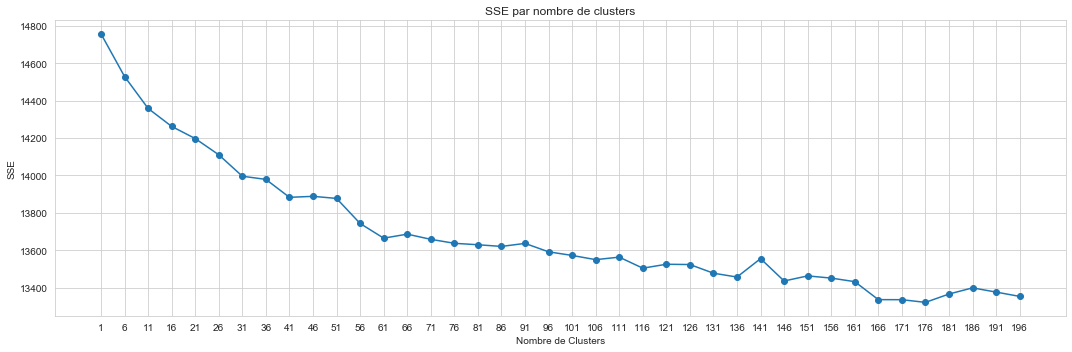

In [9]:
find_optimal_cluster(tf_idf_matrix_mono, 200)

In [10]:
clusters = MiniBatchKMeans(n_clusters=136, init_size=1024, batch_size=2048, random_state=20).fit_predict(tf_idf_matrix_mono)

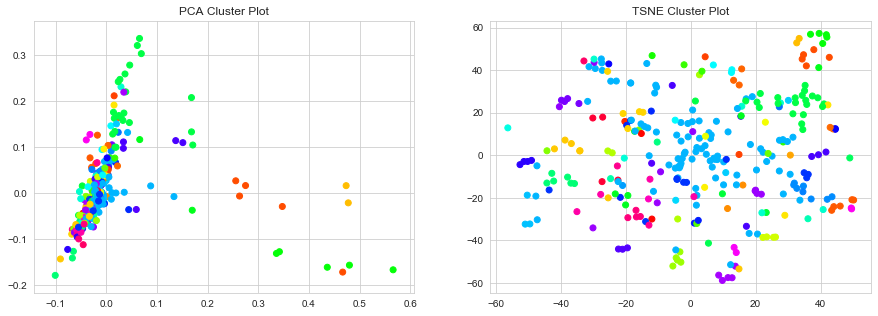

In [11]:
plot_tsne_pca(tf_idf_matrix_mono, clusters)

In [12]:
get_top_keywords(tf_idf_matrix_mono, clusters, tf_idf_vectorizer_mono.get_feature_names(), 10)


Cluster 0
versa,two,stage,stream,snippet,convert,output,thanks,outputstream,inputstream

Cluster 1
checkbox,string,object,get,use,value,id,class,type,name

Cluster 2
outputdirectory,move,dircreate,pathtomaindir,existence,directory,setwd,filepath,maindir,subdir

Cluster 3
necessary,string,loop,variables,dangerousincorrect,declare,outside,condition,str,calculatestr

Cluster 4
result,row,get,where,order,from,mysql,select,sql,query

Cluster 5
canvas,find,check,javascript,attribute,remove,class,dom,jquery,element

Cluster 6
executable,source,file,gcc,program,comandroidsupport,java,project,code,compile

Cluster 7
use,pull,change,clone,remote,commit,push,file,repository,git

Cluster 8
run,how,app,use,sdk,device,emulator,studio,application,android

Cluster 9
exit,python,how,process,unix,run,bash,command,script,shell

Cluster 10
require,how,express,run,file,server,use,nodejs,js,node

Cluster 11
selector,obj,potentially,typeof,check,var,oselector,jquery,dostuff,object

Cluster 12
prettyinformat

mergetool,open,meld,collison,merge,finally,branch,base,local,remote

Cluster 112
width,nonnative,definition,myclass,backgroundimage,foosvg,css,scale,inline,svg

Cluster 113
tablename,server,table,newname,navicat,oldname,2008,sql,column,rename

Cluster 114
customize,android,set,transparent,red,white,text,change,background,color

Cluster 115
button,textview,id,fillparent,linearlayout,matchparent,wrapcontent,layoutwidth,layoutheight,android

Cluster 116
full,maximum,reach,queue,method,saturate,block,rejectedexecutionhandler,submit,threadpoolexecutor

Cluster 117
girls,whereami,def,method,occur,due,define,foo,rails,runtime

Cluster 118
around,uiview,input,button,create,place,decimal,corner,border,round

Cluster 119
must,browsers,img,csshtml,break,errorsrc,hide,src,icon,image

Cluster 120
java,code,try,handle,error,differences,catch,exceptions,throw,exception

Cluster 121
herb,practice,class,book,struct,technique,idiom,private,pimpl,ximpl

Cluster 122
jquery,callback,code,scope,use,javascri

### 3.3. Matrice bigramme

In [13]:
tf_idf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))

In [14]:
tf_idf_matrix_bi = tf_idf_vectorizer_bi.fit_transform(df["document"].values)

In [15]:
tf_idf_matrix_bi.shape

(14987, 536365)

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


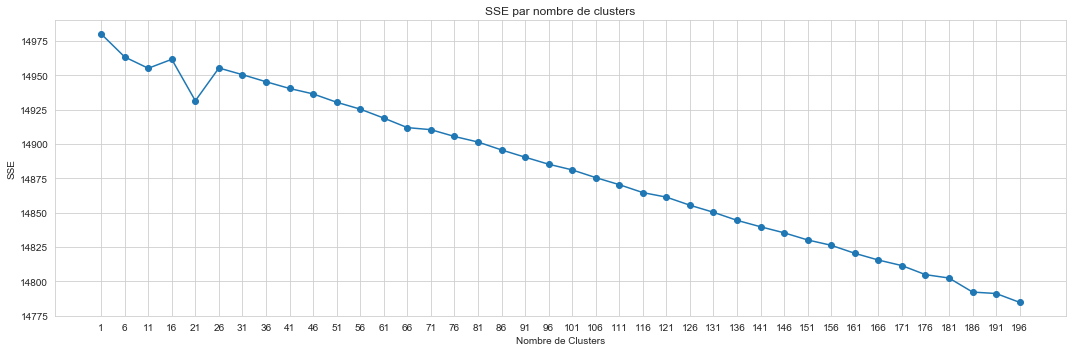

In [16]:
find_optimal_cluster(tf_idf_matrix_bi, 200)

In [17]:
clusters = MiniBatchKMeans(n_clusters=186, init_size=1024, batch_size=2048, random_state=20).fit_predict(tf_idf_matrix_bi)

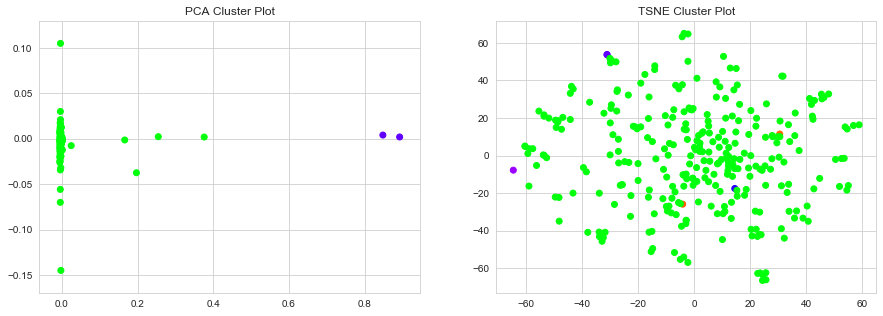

In [18]:
plot_tsne_pca(tf_idf_matrix_bi, clusters)

In [ ]:
get_top_keywords(tf_idf_matrix_bi, clusters, tf_idf_vectorizer_bi.get_feature_names(), 10)

Pour notre problème (la recherche de mot clé) l'utilisation d'une matrice monogramme est plus pertinente.

### 3.4. LDA

In [ ]:
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50, random_state=20).fit(tf_idf_matrix_mono)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic {}".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1: -1]]))

In [ ]:
display_topics(lda, tf_idf_vectorizer_mono.get_feature_names(), 5)

### 3.5. NMF

In [ ]:
nmf = NMF(n_components=20, max_iter=5, random_state=20).fit(tf_idf_matrix_mono)

In [ ]:
display_topics(nmf, tf_idf_vectorizer_mono.get_feature_names(), 5)

In [ ]:
tfidf_mono_features_nm = tf_idf_vectorizer_mono.get_feature_names()

In [ ]:
def top_tags_from_nmf(x, vec_model, nmf_mod, score_min=0.05):
    """Returns dictionnary with words maximally associated to document and their relative NMF score.
    Score of words are calculated by multiplication between NMF transformed W matrix and NMF fitted H
    (vocabulary) value to get importance of each words into topic definition.
    Args:
        x: Token to be analyzed (list of ngrams)
        vec_model: Vectorizer model used for TFIDF calculation
        nmf_mod: Trained NMF model
        score_min: threshold score for keeping word
    """
    tfidf_target = vec_model.transform(x)
    target_nmf_trans = nmf_mod.transform(tfidf_target)
    
    tags_scores = np.dot(target_nmf_trans, nmf_mod.components_).tolist()[0]

    dict_tags_score = dict(zip(tfidf_mono_features_nm, tags_scores))
    
    return { k: v for k, v in dict_tags_score.items() if v >= score_min }


In [ ]:
top_tags_from_nmf(df["document"].values, tf_idf_vectorizer_mono, nmf, score_min=0.05)

## 4. Analyse supervisé

### 4.1. Sépération dans jeu d'entrainement et jeu de test

In [ ]:
X = df["document"]
y = df["tags"]

In [ ]:
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y)

In [ ]:
mlb.classes_

In [ ]:
vectorizer_X = TfidfVectorizer(min_df=0.0, max_features=200000, ngram_range=(1,1))

In [ ]:
X_tfidf = vectorizer_X.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size=0.2, random_state=20)

In [ ]:
print("Nombre de données dans le training set : ", X_train.shape[0])
print("Nombre de données dans le test set : ", X_test.shape[0])

### 4.2. Modélisations

In [ ]:
def avg_jaccard(y_test, y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_test, y_pred).sum(axis=1) / \
        np.maximum(y_test, y_pred).sum(axis=1)
    return jacard.mean()*100


def get_score(y_pred, model, submodel=""):
    classifier_name = model.__class__.__name__
    macro_f1_score = metrics.f1_score(y_test, y_pred, average="macro")
    micro_f1_score = metrics.f1_score(y_test, y_pred, average="micro")
    jaccard_score = avg_jaccard(y_test, y_pred)
    hamming_loss = metrics.hamming_loss(y_test, y_pred)
    data = {"Macro F1 Score": macro_f1_score, "Micro F1 Score": micro_f1_score,
            "Jaccard Score": jaccard_score, "Hamming_loss": hamming_loss}
    if(submodel):
        return pd.DataFrame(data=data, index=[submodel])
    else:
        return pd.DataFrame(data=data, index=[classifier_name])

#### 4.2.1. DummyClassifier

In [ ]:
clf = OneVsRestClassifier(DummyClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dummy_score = get_score(y_pred, clf, "DummyClassifier")
dummy_score

#### 4.2.2. RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rfc_score = get_score(y_pred, clf)
rfc_score

#### 4.2.3. LogisticRegression

In [ ]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
lr_score = get_score(y_pred, clf, "LogisticRegression")
lr_score

#### 4.2.4. SGDClassifier 

In [ ]:
clf = OneVsRestClassifier(SGDClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sgdc_score = get_score(y_pred, clf, "SGDClassifier")
sgdc_score

#### 4.2.5. MultinomialNB

In [ ]:
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mnb_score = get_score(y_pred, clf, "MultinomialNB")
mnb_score

#### 4.2.6. LinearSVC

In [ ]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svc_score = get_score(y_pred, clf, "LinearSVC")
svc_score

#### 4.2.7. Perceptron

In [ ]:
clf = OneVsRestClassifier(Perceptron())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
perceptron_score = get_score(y_pred, clf, "Perceptron")
perceptron_score

#### 4.2.8. PassiveAggressiveClassifier

In [ ]:
clf = OneVsRestClassifier(PassiveAggressiveClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pac_score = get_score(y_pred, clf, "PassiveAggressiveClassifier")
pac_score

#### 4.2.9. MultiLayerPerceptron Classifier

In [ ]:
mlcp = MLPClassifier(max_iter=100, verbose=True)
mlcp.fit(X_train, y_train)
y_pred = mlcp.predict(X_test)
mlpc_score = get_score(y_pred, mlcp)
mlpc_score

In [ ]:
def highlight(val):
    is_max = val == val.max()
    return ['color: green' if v else '' for v in is_max]

def highlight_hamming(val):
    is_min = val == val.min()
    return ['color: green' if v else '' for v in is_min]

In [ ]:
score = pd.concat([rfc_score, lr_score, dummy_score, sgdc_score, mnb_score, svc_score, perceptron_score, pac_score, mlpc_score])
score = score.style.apply(highlight, subset=["Macro F1 Score", "Micro F1 Score", "Jaccard Score"])
score = score.apply(highlight_hamming, subset=["Hamming_loss"])
score

### 4.3. Amélioration des hyperparamètres

In [ ]:
param_grid = {'estimator__C':[1, 10, 100, 1000]}

## 5. Enregistrement du meilleur model

In [ ]:
clf = OneVsRestClassifier(SGDClassifier())
clf.fit(X_train, y_train)

In [ ]:
import pickle

# Enregistrement du model
with open('webapp/model/model.pkl', 'wb') as file:
    pickle.dump(clf, file)
    
# Enregistrement de TFIDFVectorizer
with open('webapp/model/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer_X, file)
    
# Enregistrement de MultiLabelBinarizer
with open('webapp/model/mlb.pkl', 'wb') as file:
    pickle.dump(mlb, file)